# HW5 SVM

Original jupyter notebook is uploaded at [GitHub](https://github.com/zhuo34/csmath2022).

## Active set method

\begin{aligned}
\min\quad& f(\mathbf{x}) = \frac{1}{2}\mathbf{x}^TH\mathbf{x}+\mathbf{c}^T\mathbf{x} \\
\textrm{s.t.}\quad& A\mathbf{x} \geq \mathbf{b}
\end{aligned}

In [105]:
import numpy as np
import scipy
import scipy.linalg


def solve_ActiveSet(H, c, A, b, x0=None, epsilon=1e-6):
    def as2darray(a):
        a = np.array(a, dtype=np.float64)
        if a.ndim == 1:
            return a[:, np.newaxis]
        return a
        
    def Lagrange(H, c, A, b):
        m, n = A.shape
        AA1 = np.hstack([H, -A.T])
        AA2 = np.hstack([A, np.zeros([m, m])])
        AA = np.vstack([AA1, AA2])
        bb = np.vstack([-c, b])
        xx = scipy.linalg.solve(AA, bb)
        # print(AA)
        # print(np.linalg.inv(AA))
        # print(np.squeeze(bb))
        return xx

    m, n = A.shape
    H, c, A, b = as2darray(H), as2darray(c), as2darray(A), as2darray(b)

    if x0 is None:
        # find x0
        idx = np.where(A[0] != 0)[0][0]
        x0 = np.zeros(n)
        x0[idx] = b[idx, 0] / A[0, idx]
    x = as2darray(x0)

    # initialize active set
    active_set = np.where(A @ x == b)[0].tolist()

    step = 0
    while True:
        step += 1
        # print(active_set)
        m_active = len(active_set)
        output = Lagrange(H, H @ x + c, A[active_set], np.zeros([m_active, 1]))
        d = output[:n]
        print(f"step {step}: {np.squeeze(x)}")
        print(f"step {step}: as {active_set}")
        print("d", np.squeeze(d))
        if np.sum(np.abs(d)) < epsilon:
            # output = Lagrange(H, H @ x + c, A[active_set], b[active_set])
            lam = np.squeeze(output[n:])
            print("lam", np.squeeze(lam))
            if np.min(lam) >= 0:
                break
            idx = np.argmin(lam)
            active_set.pop(idx)
        else:
            active_map = np.zeros(m)
            active_map[active_set] = 1
            not_active_map = active_map == 0
            map2 = np.squeeze(A @ d) < 0
            alpha_map = np.logical_and(not_active_map, map2)
            in_active_idx = np.argmin(np.squeeze(A @ d))
            alpha = 1
            if np.sum(alpha_map) > 0:
                alpha = min(1, np.min((b[alpha_map] - A[alpha_map] @ x) / (A[alpha_map] @ d)))
            
            x += alpha * d

            if alpha != 1:
                active_set.append(in_active_idx)
    return np.squeeze(x)

H = np.array([[2, 0], [0, 2]])
c = np.array([-2, -5])
A = np.array([
    [1, -2],
    [-1, -2],
    [-1, 2],
    [1, 0],
    [0, 1]
])
b = np.array([-2, -6, -2, 0, 0])
x0 = np.array([2, 0])

x = solve_ActiveSet(H, c, A, b, x0=x0)
print(x)

step 1: [2. 0.]
step 1: as [2, 4]
d [6.66133815e-16 4.44089210e-16]
lam [-2. -1.]
step 2: [2. 0.]
step 2: as [4]
d [-1.  0.]
step 3: [1. 0.]
step 3: as [4]
d [-0.  0.]
lam -5.0
step 4: [1. 0.]
step 4: as []
d [-0.   2.5]
step 5: [1.  1.5]
step 5: as [0]
d [0.4 0.2]
step 6: [1.4 1.7]
step 6: as [0]
d [1.11022302e-16 0.00000000e+00]
lam 0.8
[1.4 1.7]


## SVM

$$
\begin{aligned}
\min_{\mathbf{w},b}\quad&\frac{1}{2}||\mathbf{w}||^2 \\
\textrm{s.t.}\quad& y_i(\mathbf{w}^T\mathbf{x}_i+b) \geq 1,\quad i=1,2,\dots,m
\end{aligned}
$$


(200, 2) (200,)
(3, 3) (3,) (200, 3) (200,)
step 1: [-1.30603111  0.          0.        ]
step 1: as [0]
d [1.30603111 0.         1.        ]
step 2: [-3.68057236  0.         -1.81813529]
step 2: as [0, 141]
d [ 1.33459572  1.76944353 -0.79262505]
step 3: [-109.9042623  -140.8342744    61.26880246]
step 3: as [0, 141, 88]
d [-2.33809267e-14 -5.68434189e-14 -9.82581323e-16]
lam [-258.34863736   10.28683975  268.63547711]
step 4: [-109.9042623  -140.8342744    61.26880246]
step 4: as [141, 88]
d [ 65.92982413 159.061371     2.06512787]
step 5: [-43.97443817  18.2270966   63.33393033]
step 5: as [141, 88]
d [-8.07114308e-15 -1.95399252e-14 -2.91703830e-16]
lam [18.21298774 18.21298774]
[-43.97443817  18.2270966 ] 63.333930325217985
101
2.4125860049163332 -3.474713044659261


C:\Users\zhuoc\AppData\Local\Temp\ipykernel_16668\2074465381.py:27: RuntimeWarning: covariance is not positive-semidefinite.
  X1 = np.random.multivariate_normal(mu1, cov1, 100)
C:\Users\zhuoc\AppData\Local\Temp\ipykernel_16668\2074465381.py:33: RuntimeWarning: covariance is not positive-semidefinite.
  X2 = np.random.multivariate_normal(mu2, cov2, 100)


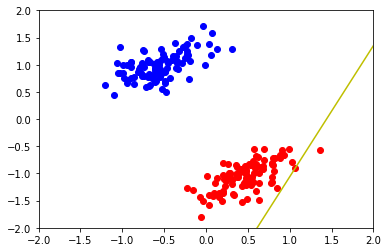

In [103]:
import matplotlib.pyplot as plt
import sklearn


def svm(X, y):
    m, n = X.shape
    H = np.eye(n+1)
    H[-1, -1] -= 1
    c = np.zeros(n+1)
    XX = np.hstack([X, np.ones([m, 1])])
    A = y[:, np.newaxis] * XX
    b = np.ones(m)
    print(H.shape, c.shape, A.shape, b.shape)

    ww = solve_ActiveSet(H, c, A, b)
    w = ww[:-1]
    b = ww[-1]
    return w, b


np.random.seed(1234)
mu1 = np.array([-0.5, 1])
cov1 = np.array([
    [.1, .1],
    [.05, .01]
])
X1 = np.random.multivariate_normal(mu1, cov1, 100)
mu2 = np.array([0.5, -1])
cov2 = np.array([
    [.1, .1],
    [.05, .01]
])
X2 = np.random.multivariate_normal(mu2, cov2, 100)

plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.scatter(X1[:, 0], X1[:, 1], c='b')
plt.scatter(X2[:, 0], X2[:, 1], c='r')
# plt.show()

X = np.vstack([X1, X2])
y = np.hstack([[1] * X1.shape[0], [-1] * X2.shape[0]])
print(X.shape, y.shape)

w, b = svm(X, y)
print(w, b)

print(np.sum(y * (X @ w + b) >= 0))

k, b = -w[0]/w[1], -b/w[1]
print(k, b)
x = np.linspace(-2, 2, 100)
y = k * x + b
plt.plot(x, y, c='y')
plt.show()